In [21]:
import numpy as np
import time
import threading
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [22]:
# Function to multiply matrices
def multiply_matrices(matrices, constant_matrix, num_threads):
    start_time = time.time()
    threads = []
    results = [None] * len(matrices)

    # Define function for each thread to perform matrix multiplication
    def multiply_thread(start, end, result_index):
        for i in range(start, end):
            result = np.dot(matrices[i], constant_matrix)
            results[i] = result

    # Calculate number of matrices per thread
    matrices_per_thread = len(matrices) // num_threads

    # Create and start threads
    for i in range(num_threads):
        start = i * matrices_per_thread
        end = (i + 1) * matrices_per_thread if i < num_threads - 1 else len(matrices)
        thread = threading.Thread(target=multiply_thread, args=(start, end, i))
        threads.append(thread)
        thread.start()

    # Wait for all threads to finish
    for thread in threads:
        thread.join()

    end_time = time.time()
    return end_time - start_time

In [23]:
# Generate random matrices
num_matrices = 100
matrix_size = 1000
random_matrices = [np.random.rand(matrix_size, matrix_size) for _ in range(num_matrices)]
constant_matrix = np.random.rand(matrix_size, matrix_size)

In [24]:
# Perform matrix multiplication with different numbers of threads
threads = [1, 2, 3, 4, 5, 6, 7, 8]
time_taken = []
for t in threads:
    time_taken.append(multiply_matrices(random_matrices, constant_matrix, t))

In [29]:
# Create a pandas DataFrame for the result table
result_table = pd.DataFrame({'Threads': threads, 'Time Taken (Sec)': time_taken})

# Print the result table
print("Result Table:")
print(result_table)

Result Table:
   Threads  Time Taken (Sec)
0        1          6.456953
1        2          7.217382
2        3          6.445076
3        4          8.522839
4        5          7.292090
5        6          6.036964
6        7          7.775941
7        8          6.355502


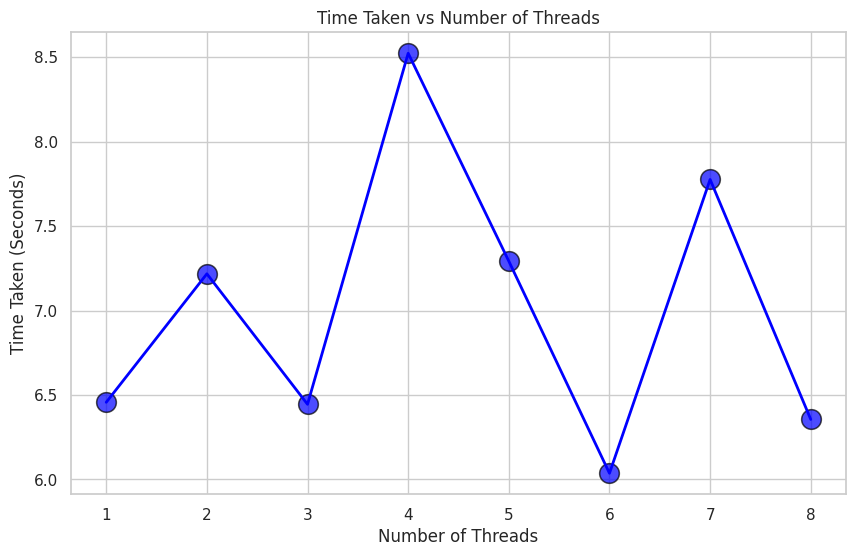

In [36]:
# Generate fancy scatter plot with lines connecting the points
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
# Scatter plot
sns.scatterplot(x='Threads', y='Time Taken (Sec)', data=result_table, s=200, color='blue', edgecolor='black', alpha=0.7)
# Line plot
sns.lineplot(x='Threads', y='Time Taken (Sec)', data=result_table, color='blue', linewidth=2)

plt.title('Time Taken vs Number of Threads')
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken (Seconds)')
plt.xticks(threads)
plt.grid(True)
plt.show()
